### Namen en studentnummers:

 **Murielle Tichelaar** (500926485)  
 **Nalini Bisessar** (500874334)  
 **Lushan Strack** (500934278)  
 **Dinand Voogt** (500934202) 

### Projectinformatie:

**Opleiding:** Toegepaste Wiskunde & Data Science  
**Vak:** Beroepsproject 3.4  
**Begeleider:** R. Nolet  
**Datum:** 20-02-2026  

### Doel/opdracht van het bestand:
Dataverkenning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Fase 1 - Business understanding

Het telecombedrijf hanteert momenteel één standaard tariefplan (tariefplan 1) en overweegt
een tweede, goedkoper tariefplan (tariefplan 2) om klanten met een hoog churnrisico te behouden.

### Tariefplan 1
- Bellen: **€0,30 per minuut**
- SMS: **€0,10 per SMS**

### Tariefplan 2
- Bellen: **€0,20 per minuut**
- SMS: **€0,07 per SMS**

Tariefplan 2 is goedkoper voor de klant, maar levert per klant minder omzet op voor het bedrijf.
Daarom is het niet rendabel om dit tarief aan alle klanten aan te bieden. Het churnmodel wordt
gebruikt om te bepalen **welke klanten** in aanmerking komen voor tariefplan 2 op basis van hun
verwachte churnkans.


Laat:
- \( p \)  = kans dat een klant zijn abonnement opzegt (voorspeld door het model)
- \( Wi_1 \) = verwachte winst van klant *i* bij tariefplan 1
- \( Wi_2 \) = verwachte winst van klant *i* bij tariefplan 2

---

### Verwachte winst bij tariefplan 2

**Klant wil vertrekken**  
Wanneer een klant wil vertrekken met kans \( p \), blijft deze klant in 25% van de gevallen
toch bij het bedrijf als tariefplan 2 wordt aangeboden. De verwachte winst in dit geval is:

p{ (0.25 * Wi_2) + (0.75 * 0) } = 0.25p * Wi_2

**Klant wil niet vertrekken**  
Wanneer een klant niet wil vertrekken (met kans \( 1 - p \)), levert tariefplan 2 altijd winst op:

(1 - p) * Wi_2

**Totale verwachte winst bij tariefplan 2**

E[winst∣tarief 2]={ (1 − p)Wi_2 } + (0.25pWi_2)
= { (1 - p) + 0,25p }Wi_2
= (1 - 0,75p)Wi_2 

---

### Verwachte winst bij tariefplan 1

**Klant wil vertrekken**  
Wanneer de klant wil vertrekken en er geen actie wordt ondernomen, is de winst:

p * 0 = 0

**Klant wil niet vertrekken**  
Wanneer de klant niet wil vertrekken, blijft deze klant bij tariefplan 1:

(1 - p) * Wi_1

**Totale verwachte winst bij tariefplan 1**

E[winst∣tarief 1] = 0 + (1 - p) * Wi_1
 = (1 - p) Wi_1

---

### Beslisregel

Tariefplan 2 wordt aangeboden wanneer de verwachte winst daarvan groter is dan die van tariefplan 1:

(1 - 0,75p)Wi_2 > (1 - p)Wi_1

Oplossen naar \( p \) geeft de volgende drempelwaarde:

p > (Wi_1 − Wi_2) / (Wi_1 – (0,75Wi_2))

---

### Conclusie

- Als de voorspelde churnkans \( p \) **groter is dan de drempelwaarde**, wordt tariefplan 2 aangeboden.
- Als \( p \) **kleiner is dan de drempelwaarde**, blijft tariefplan 1 gehandhaafd.



##



## Fase 2 - Data Understanding

### Basis Begrip


In [2]:
# Alleen train inladen
train_path = "../../data/data_train.csv" 
df = pd.read_csv(train_path, sep=",", decimal=".")

df.head()

,Call Failure,Complaints,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Age,Churn
0,1,0,39,2970,29,487,11,3,30,0
1,5,0,20,1755,29,33,16,2,25,0
2,0,0,38,990,20,32,15,2,25,0
3,24,0,29,16370,242,14,93,2,25,0
4,9,0,40,4075,67,7,4,3,30,0


In [ ]:
# Onderzoek de data
print("Shape:", df.shape)
display(df.info()) 


Shape: (1995, 10)
<class 'pandas.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Call Failure             1995 non-null   int64
 1   Complaints               1995 non-null   int64
 2   Subscription Length      1995 non-null   int64
 3   Seconds of Use           1995 non-null   int64
 4   Frequency of use         1995 non-null   int64
 5   Frequency of SMS         1995 non-null   int64
 6   Distinct Called Numbers  1995 non-null   int64
 7   Age Group                1995 non-null   int64
 8   Age                      1995 non-null   int64
 9   Churn                    1995 non-null   int64
dtypes: int64(10)
memory usage: 156.0 KB


None

We zien 1995 data entries en 10 variables, ook zien we in de tabel dat er geen missing values zijn

In [4]:
df.agg(["mean","std", "min", "max", "median"]).T

,mean,std,min,max,median
Call Failure,7.631078,7.256460,0.0,36.0,6.0
Complaints,0.078195,0.268546,0.0,1.0,0.0
Subscription Length,32.379950,8.667200,3.0,47.0,35.0
Seconds of Use,4462.505764,4201.815905,0.0,16980.0,2960.0
Frequency of use,69.116792,57.634739,0.0,254.0,53.0
Frequency of SMS,73.318296,112.164187,0.0,522.0,20.0
Distinct Called Numbers,23.567920,17.393948,0.0,97.0,21.0
Age Group,2.824060,0.897798,1.0,5.0,3.0
Age,30.994987,8.881815,15.0,55.0,30.0
Churn,0.167920,0.373889,0.0,1.0,0.0


               variable  outlier_count  outlier_pct
                    Age            429        21.50
                  Churn            335        16.79
       Frequency of SMS            218        10.93
             Complaints            156         7.82
    Subscription Length            144         7.22
         Seconds of Use            127         6.37
              Age Group            115         5.76
       Frequency of use             85         4.26
Distinct Called Numbers             50         2.51
           Call Failure             45         2.26


Text(0, 0.5, 'Values')

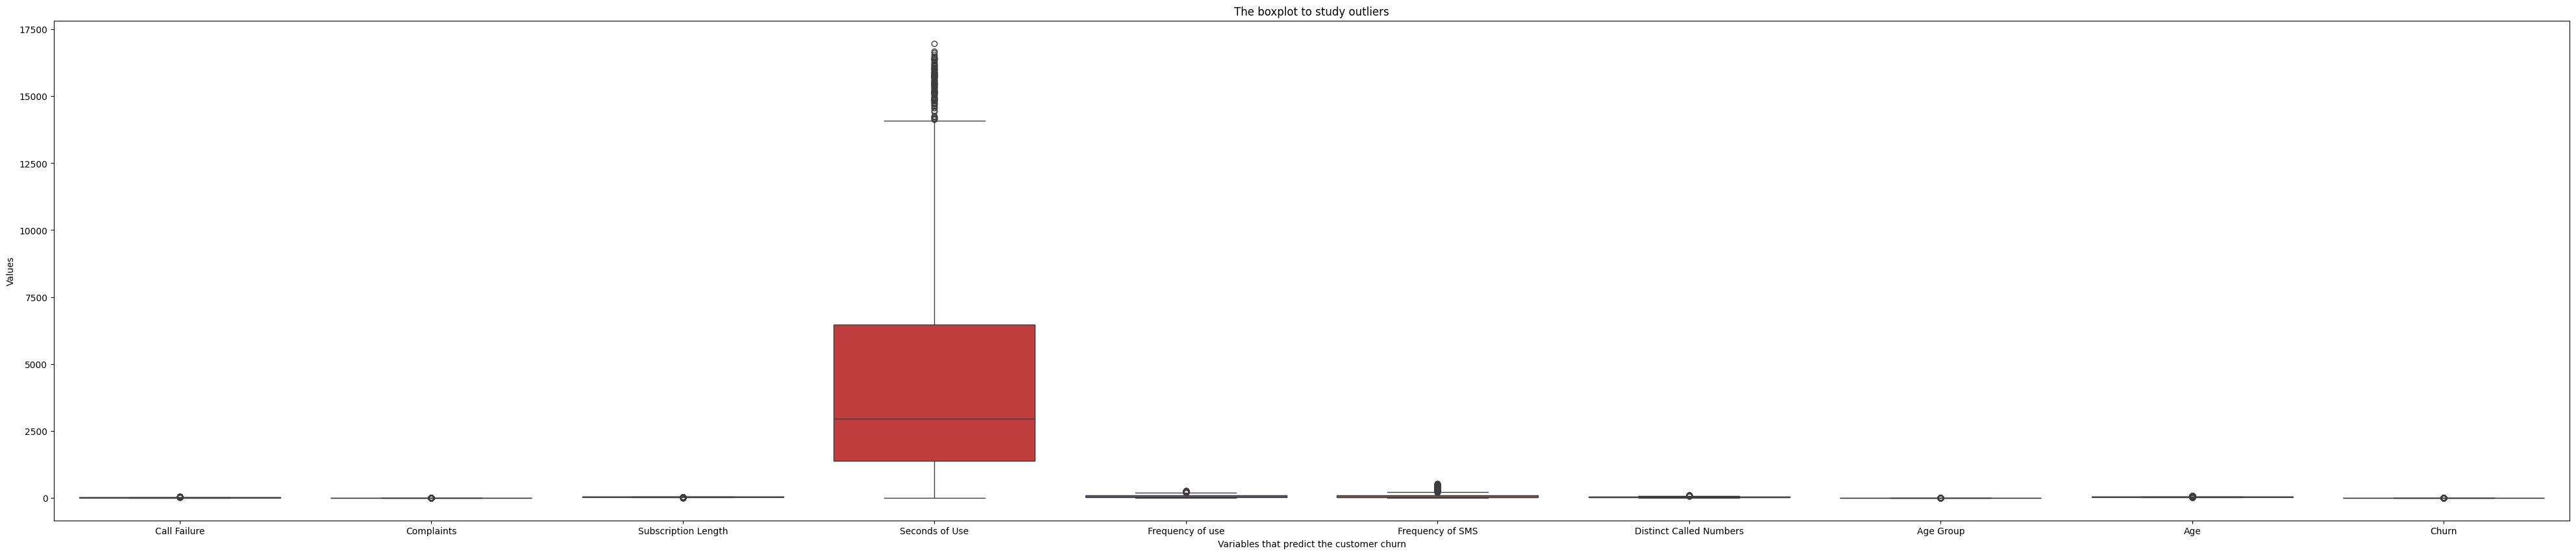

In [ ]:
# checken op uitschieters
num_cols = df.select_dtypes(include=[np.number]).columns

# Bereken uitschieters hoeveelheid en percentages
results = []
for col in num_cols:
    series = df[col].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_mask = (series < lower) | (series > upper)
    count = outlier_mask.sum()
    pct = (count / series.count()) * 100
    results.append({
        'variable': col,
        'outlier_count': count,
        'outlier_pct': round(pct, 2)
    })

# Tabel
outlier_df = pd.DataFrame(results).sort_values(by='outlier_pct', ascending=False)
print(outlier_df.to_string(index=False))

plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')


Hier kijken we naar de min max mean en median van alle variabelen om te kijken of er gekke dingen uitspringen, daar lijkt het niet op.
Mogelijk dat Seconds of Use rechts verdeeld is -> een aantal mensen bellen héél veel, mogelijk dat we dit kunnen/moeten transformeren.

---
### Visualisaties


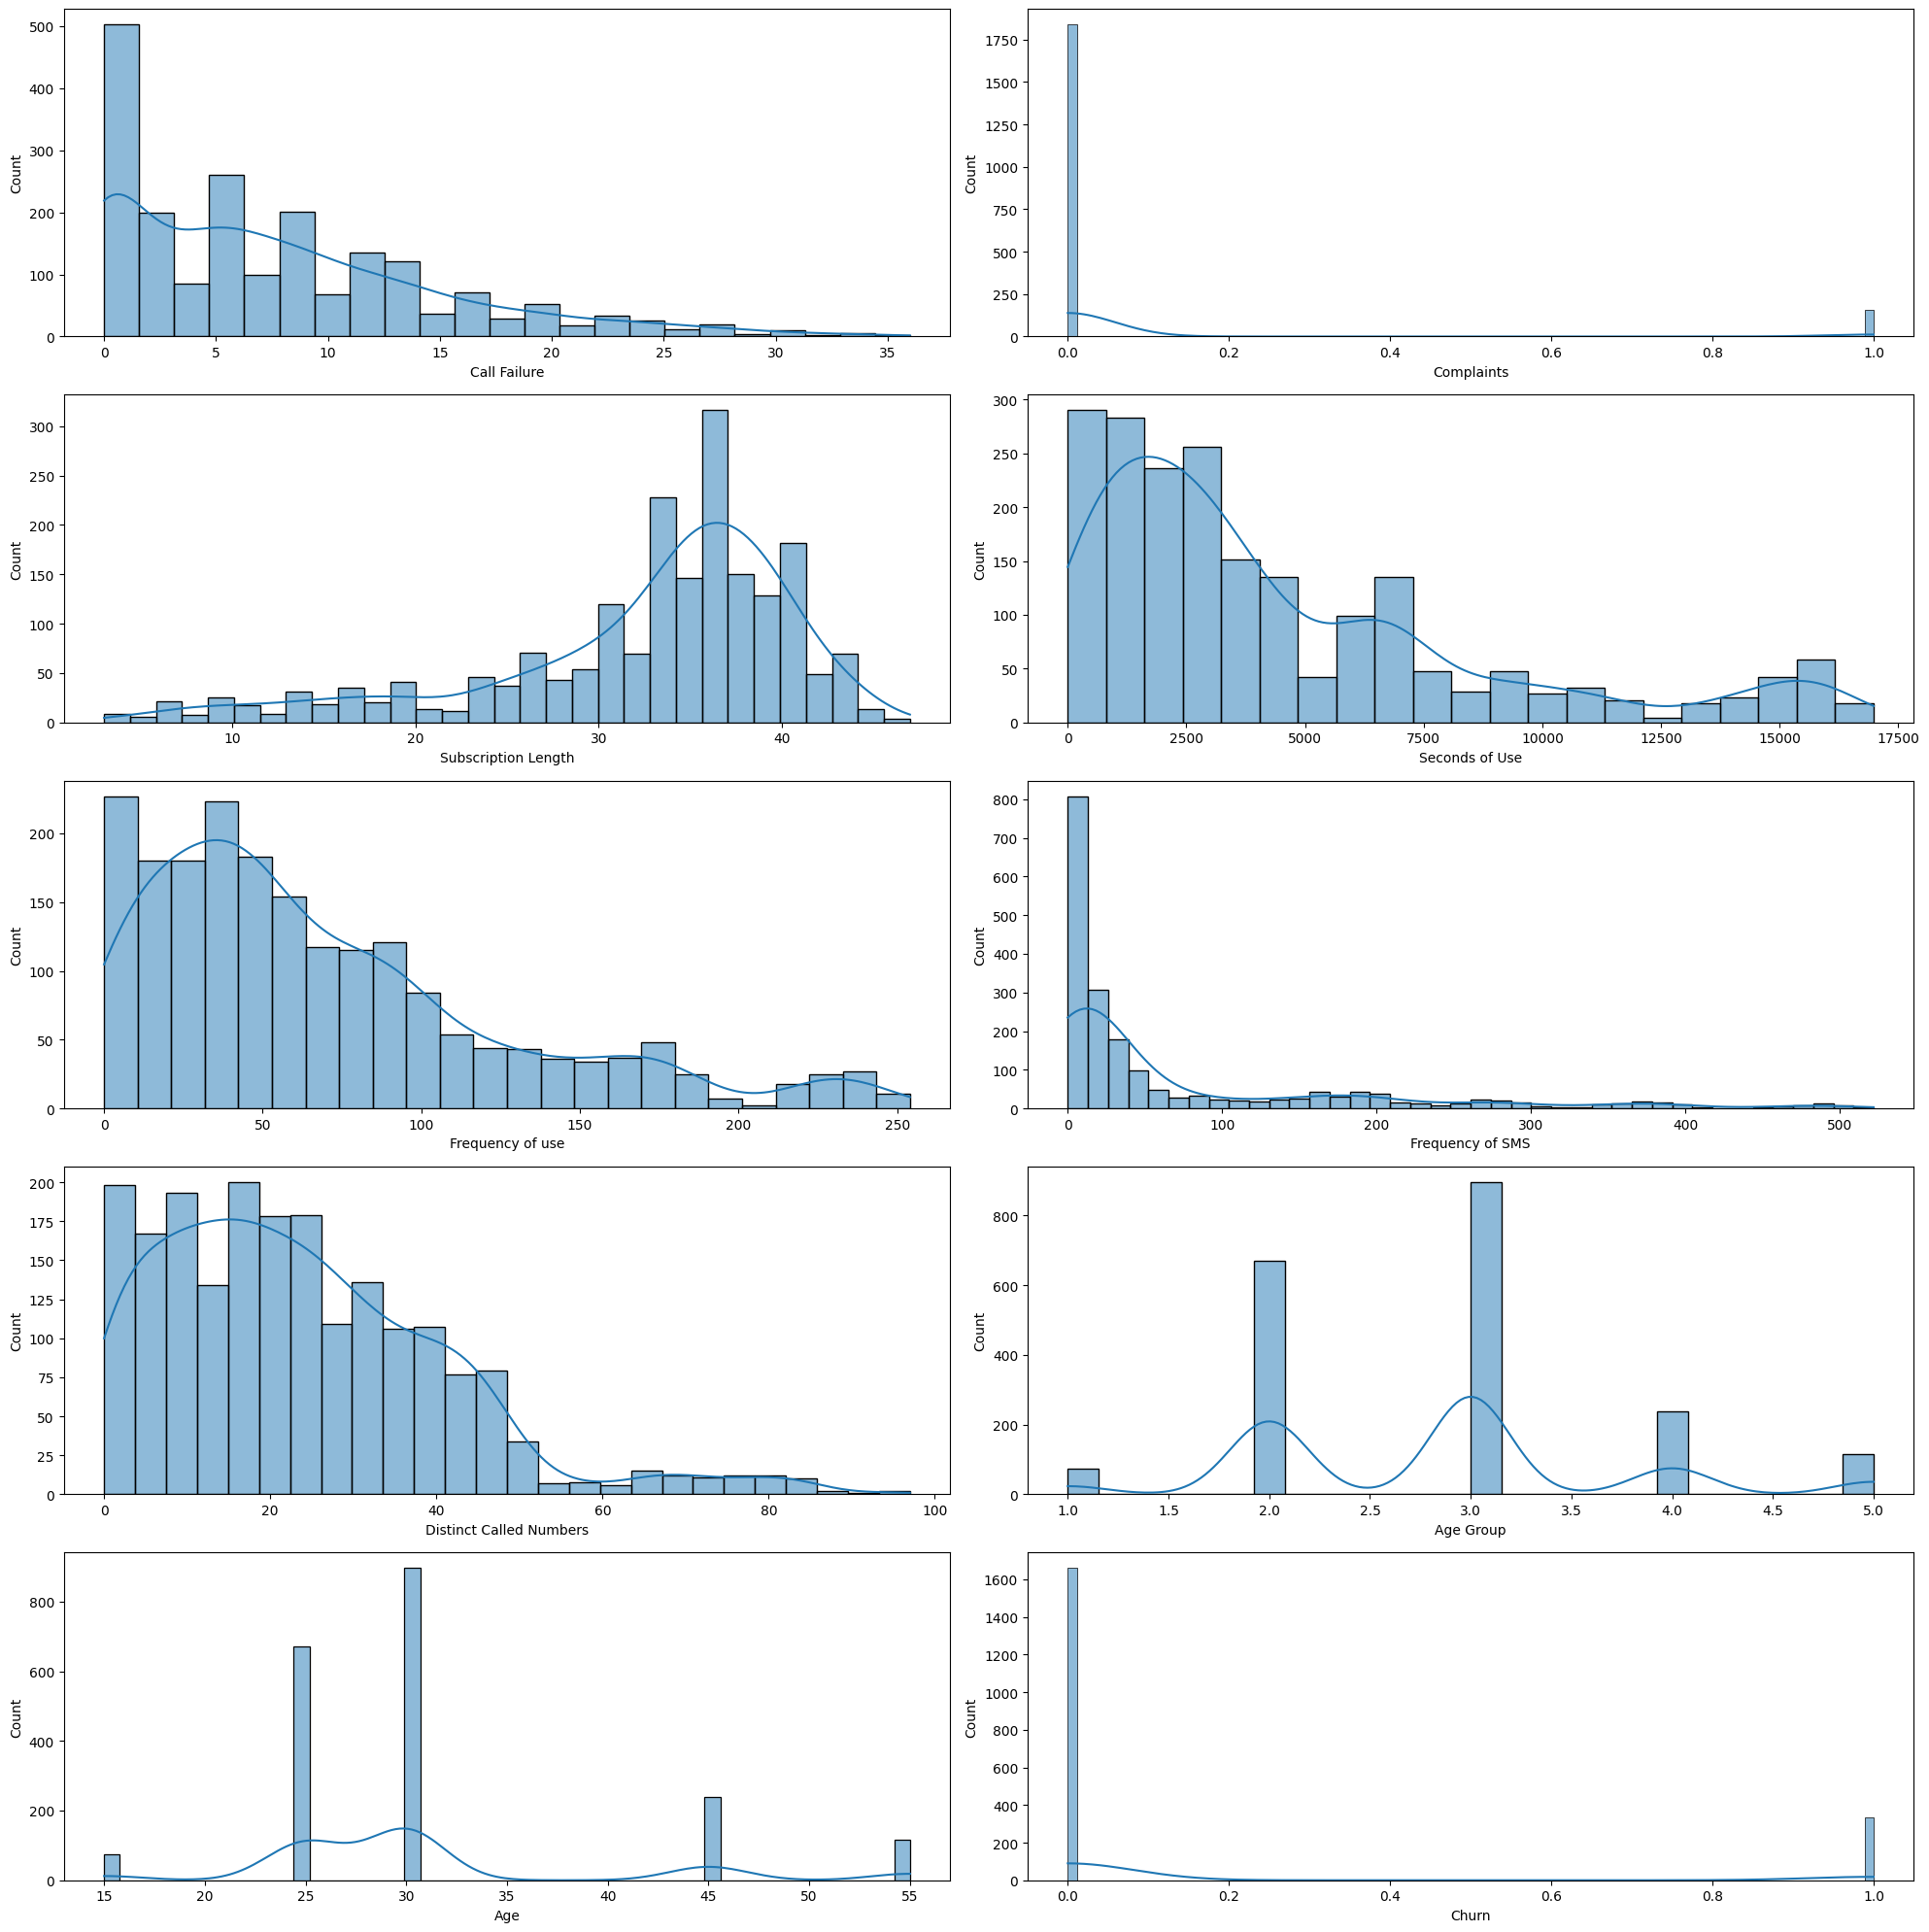

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(20,20))
for col, a in zip(df.select_dtypes(include='number').columns, ax.flatten()):
    sns.histplot(df[col], kde=True, ax=a)
plt.tight_layout()
plt.show()

In [ ]:
# Correlatiematrix en correlatie van de variabelen t.o.v. Churn

numeric_cols = df.select_dtypes(include='number').columns

# Volledige correlatiematrix
corr_matrix = df[numeric_cols].corr()

# Correlatie met Churn
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values()

feature_desc = {
    "Call Failure": "Aantal mislukte belpogingen",
    "Complaints": "Heeft klant een klacht ingediend? (0=nee, 1=ja)",
    "Subscription Length": "Aantal maanden dat klant een abonnement heeft",
    "Seconds of Use": "Totale beltijd in seconden",
    "Frequency of use": "Totaal aantal telefoongesprekken",
    "Frequency of SMS": "Totaal aantal verstuurde SMS",
    "Distinct called numbers": "Aantal unieke telefoonnummers waarnaar gebeld is",
    "Age Group": "Leeftijdsgroep (1=jong, 5=oud)",
    "Age": "Leeftijd in jaren",
}

hover_texts = [feature_desc.get(f, "Geen beschrijving") for f in churn_corr.index]

# Heatmap van volledige correlatiematrix
fig_heatmap = px.imshow(
    corr_matrix,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    text_auto='.2f',
    title='Correlatie Heatmap van alle features',
    aspect='auto'
)
fig_heatmap.update_layout(
    template='plotly_white',
    width=1000,
    height=500,
)

fig_heatmap.show()

# Horizontale bar chart voor Churn correlatie
fig_bar = px.bar(
    x=churn_corr.values,
    y=churn_corr.index,
    orientation='h',
    color=churn_corr.values,
    color_continuous_scale='RdBu',
    title='Correlatie van features t.o.v. Churn'
)

fig_bar.update_traces(
    texttemplate='%{x:.2f}',
    textposition='auto',
    customdata=hover_texts,
    hovertemplate="%{y}: %{customdata}<br>Correlatie: %{x}"
)

fig_bar.update_layout(
    xaxis_title='Correlatie',
    yaxis_title='Feature',
    template='plotly_white',
    coloraxis_colorbar=dict(title='Correlatie'),
    width=1000,
    height=500,
)

fig_bar.show()


Opvallend: sterk correlerende variabelen
- Seconds of Use en Frequency of Use
- Age Group en Age

In [ ]:
# De verdeling van Churn weergeven in een taartdiagram

# Bereken aantallen
churn_counts = df["Churn"].value_counts().reset_index()
churn_counts.columns = ["Churn", "Aantal"]
churn_counts['Churn_label'] = churn_counts['Churn'].map({0: 'Gebleven', 1: 'Opgezegd'})
churn_counts['Legend_label'] = churn_counts.apply(
    lambda row: f"{row['Churn_label']} ({row['Aantal']})", axis=1
)

colors = {"Gebleven": "#1f77b4", "Opgezegd": "#d62728"}

fig = px.pie(
    churn_counts,
    names='Legend_label',  
    values='Aantal',
    color='Churn_label',
    color_discrete_map=colors,
    hole=0.3,
    width=700,
    height=400,
    title='Percentage Customer Churn'
)

# Slice labels alleen percentage
fig.update_traces(
    textinfo='percent',
    pull=[0, 0.1],
    hovertemplate='%{label}<br>Aantal: %{value}<br>Percentage: %{percent}'
)

fig.update_layout(template='simple_white', title_font_size=20)

fig.show()

Opvallend: De dataset is dus overduidelijk ongebalanceerd.
Het is belangrijk dat we de vertrekkers juist identificeren.
Dit betekent dat we waarschijnlijk accuracy niet als maatstaf kunnen gebruiken omdat dan het model zal voorspellen dat de klant altijd blijft voor een relatief hoge accuracy.
We moeten kijken naar andere maatstafen die daar wel mee kunnen omgaan, precision, recall, f1-score??